In [62]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

- Read data

In [63]:
df = pd.read_csv("../data/atm_pressure.csv")
df


,Atm,Temperature
0,20.79,194.5
1,20.79,194.3
2,22.40,197.9
3,22.67,198.4
4,23.15,199.4
5,23.35,199.9
6,23.89,200.9
7,23.99,201.1
8,24.02,201.4
9,24.01,201.3


In [64]:
temps = np.array(df["Temperature"])
atms = np.array(df["Atm"])
temps.shape

(17,)

- Plot 

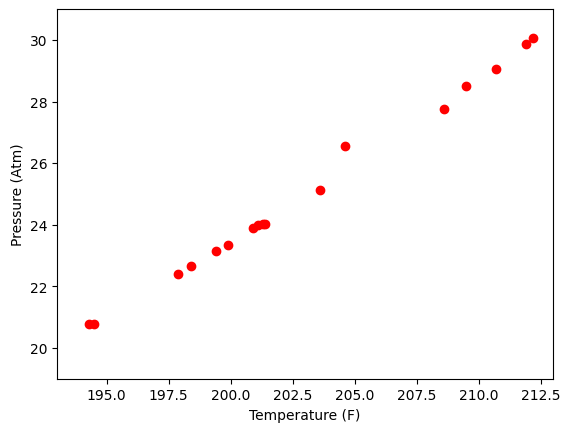

In [65]:
plt.scatter(temps, atms, color="red", marker="o", )
plt.axis([193, 213, 19, 31])
plt.xlabel("Temperature (F)")
plt.ylabel("Pressure (Atm)")

plt.show()

- y = w0 + w1 * x <br/>
=> (atm = w0 + w1 * temp)
- Calculate the cofficients w0, w1. 



- deviation of X: X - mean(X) 
- deviation of Y: Y - mean(Y)

- w1 = Cov(X, Y) / var(X)

![Alt text](image.png)
- y_h = w0 + w1 * x_h <br/>
=> w0 = y_h - w1 * x_h

- calculate means

In [66]:
x_h = np.mean(temps)
y_h = np.mean(atms)
print(y_h)

25.058823529411764


- calculate covarian
- np.cov(x, y) will return: <br/>
cov(x,x) cov(x,y) <br/>
cov(y,x) cov(y,y)


In [97]:
cov = np.cov(temps, atms)
cov = cov[0, 1]
var = np.var(temps)

- calculate w0, w1

In [98]:
w1 = cov/ var
w0 = y_h - w1 * x_h

- plot both datas

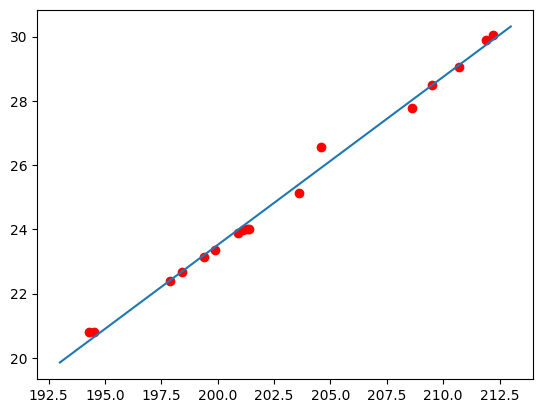

In [99]:
x_h = np.linspace(193, 213, 2)
y_h = w0 + w1 * x_h

plt.plot(x_h, y_h)
plt.scatter(temps, atms, color="red", marker="o")